# **Creating Models**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Creating the dataframe for the 2023 dataset

datapath = "./../cleaned_dataset_2023.csv"
df = pd.read_csv(datapath)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,16-01-2023,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,16-01-2023,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,16-01-2023,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,16-01-2023,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,16-01-2023,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [30]:
df["Journey_month"] = pd.to_datetime(df["Date_of_journey"], format = "%d-%m-%Y").dt.month
df["Journey_day"] = pd.to_datetime(df.Date_of_journey, format="%d-%m-%Y").dt.day

In [31]:
# Encoding the training dataset
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Class = df[["Class"]]
Class = pd.get_dummies(Class, drop_first= True)
Departure = df[["Departure"]]
Departure = pd.get_dummies(Departure, drop_first= True)
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
df["Destination"].value_counts()
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
df.drop(["Flight_code"], axis = 1, inplace = True)
df.replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)
df4 = pd.concat([df, Airline, Class, Source, Destination, Departure], axis = 1)
df4.drop(["Airline", "Class", "Source", "Destination", "Date_of_journey", "Journey_day", "Arrival", "Departure"], axis = 1, inplace = True)
print(df4.head())
df = df4

   Total_stops  Duration_in_hours  Days_left  Fare  Journey_month  \
0            0             2.0833          1  5335              1   
1            0             2.3333          1  5899              1   
2            0             2.1667          1  5801              1   
3            0             2.0833          1  5794              1   
4            0             2.1667          1  5955              1   

   Airline_AirAsia  Airline_AkasaAir  Airline_AllianceAir  Airline_GO FIRST  \
0                0                 0                    0                 0   
1                0                 0                    0                 0   
2                0                 0                    0                 1   
3                0                 0                    0                 0   
4                0                 0                    0                 0   

   Airline_Indigo  ...  Source_Mumbai  Destination_Bangalore  \
0               0  ...              0         

In [32]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df.drop(['Fare'],axis=1)
y=df['Fare']

In [33]:
df.head()

,Total_stops,Duration_in_hours,Days_left,Fare,Journey_month,Airline_AirAsia,Airline_AkasaAir,Airline_AllianceAir,Airline_GO FIRST,Airline_Indigo,...,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai,Departure_6 AM - 12 PM,Departure_After 6 PM,Departure_Before 6 AM
0,0,2.0833,1,5335,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,2.3333,1,5899,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,0,2.1667,1,5801,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,2.0833,1,5794,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,2.1667,1,5955,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [34]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((316461, 30), (135627, 30), (316461,), (135627,))

In [35]:
# Finding important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

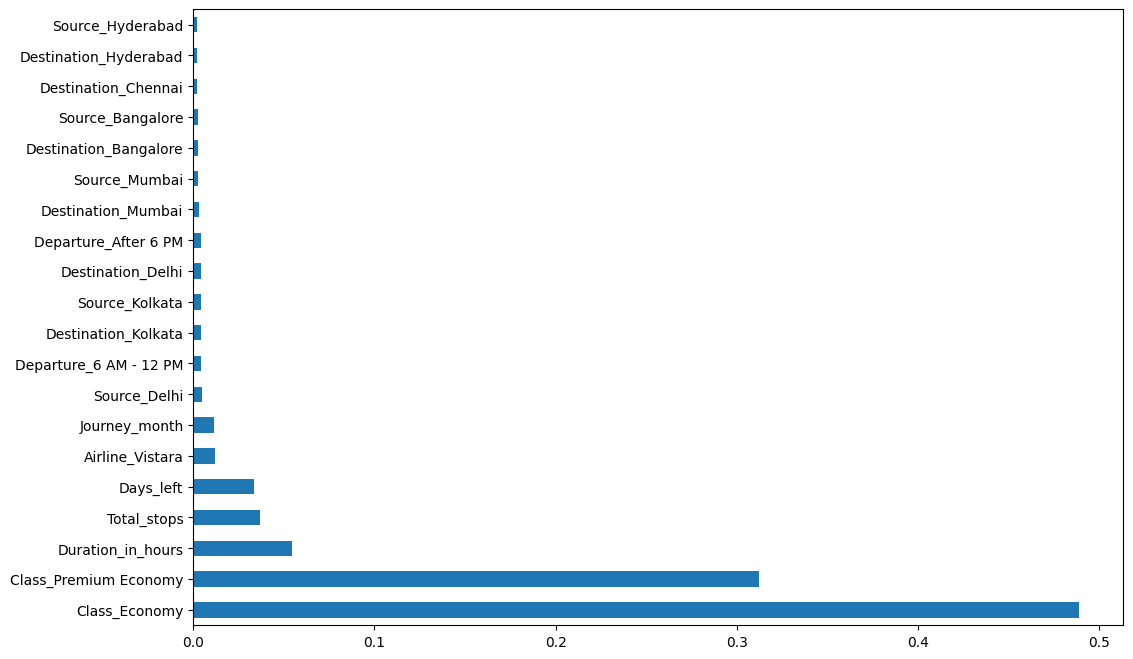

In [36]:
# Ploting graph of feature importances

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
# Fitting the model using Random forest

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = reg_rf.predict(x_test)

0.991589683951457
0.9502444997210721


C:\Users\rragh\AppData\Local\Temp\ipykernel_21312\2987870730.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


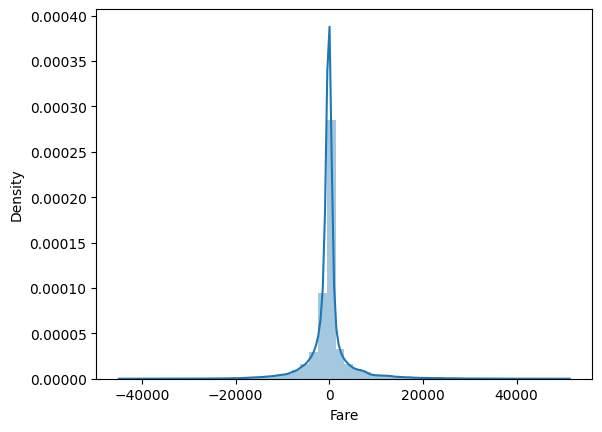

In [42]:
# Printing their performance and accuracy score R2 and plotting the graph

print(reg_rf.score(x_train, y_train))
print(reg_rf.score(x_test, y_test))

sns.distplot(y_test-y_pred)
plt.show()

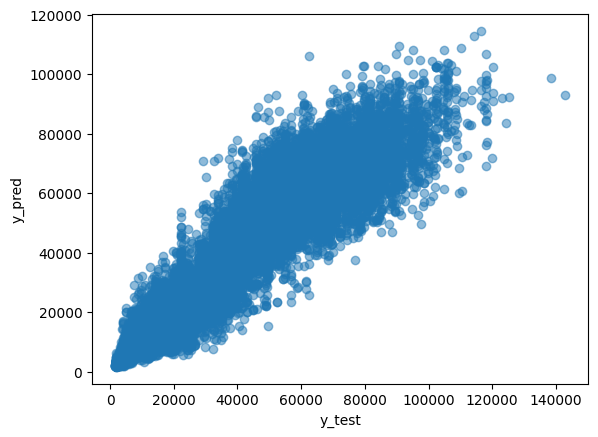

In [43]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [44]:
# Finding the mean square error absoulute error 
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2: ', metrics.r2_score(y_test, y_pred))

MAE: 2204.8046441796005
MSE: 20532454.66525193
RMSE: 4531.275169888928
R2:  0.9502444997210721


In [45]:
# Hyperparameter tuning

#Randomized Search CV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [48]:
# Creating the random the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [49]:
# Random search of parameters, using 5 fold cross validation, search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.5min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 3.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 7.6min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time= 7.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 8.3min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 8.4min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 7.8min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 8.3min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time= 7.8min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 9.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 9.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 9.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 9.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time= 8.7min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=18.0min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=15.8min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=14.0min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=13.9min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=13.8min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.9min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.8min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 2.9min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 3.0min
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 3.3min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time= 2.0min
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time= 2.0min
[CV] END max_depth=5, max_feat

c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=14.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=14.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=14.1min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=14.1min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=14.2min


c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\ensemble\_forest.py", line 473, in fit
    trees = Parallel(
  File "c:\Users\rragh\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [50]:
# Printing the best parameters aftering finding

print(rf_random.best_params_)

{'n_estimators': 700, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


C:\Users\rragh\AppData\Local\Temp\ipykernel_21312\3262887837.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


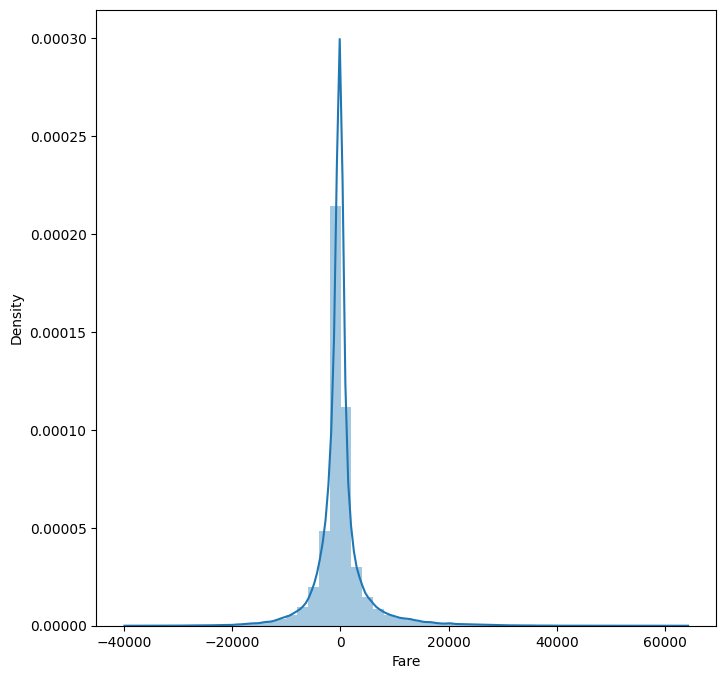

In [51]:
# Predicting using the training after choosing best features and plotting graph

prediction = rf_random.predict(x_test)

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

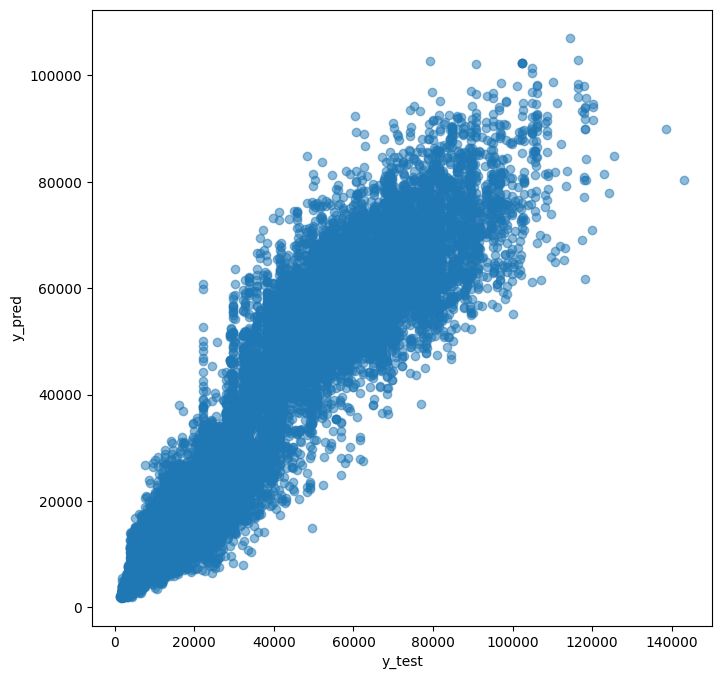

In [52]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [53]:
# Printing the accuracy score and square errors of trained model

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2: ', metrics.r2_score(y_test, prediction))
print('Accuracy: ', metrics.score(x_test, y_test))


MAE: 2519.111963233155
MSE: 22219510.396787748
RMSE: 4713.757566611562
R2:  0.9461563230617536


AttributeError: module 'sklearn.metrics' has no attribute 'score'

In [58]:
# Saving the model to a pickel file
import pickle

file = open('random_forest_2023.pkl', 'wb')
pickle.dump(rf_random, file)

MemoryError: 

In [60]:
# Saving the model to a joblib file
import joblib

joblib.dump(rf_random , 'random_forest_2023_jlib')

['random_forest_2023_jlib']

In [61]:
# Using the joblib file to get the trained model
forest = joblib.load('random_forest_2023_jlib')

y_prediction = forest.predict(X_test)
metrics.r2_score(y_test, y_prediction)

MemoryError: could not allocate 15536248 bytes